In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
from pymc3 import *
import arviz as az

# Posterior distributions for regression models

Recall that in Bayesian inference the **posterior** distribution expresses our belief about parameters in our model *after* we see the data. Formally, the posterior can be computed using Bayes theorem, but in practice we usually use sampling methods, like those built into pymc to draw samples from the posterior. These can be compared to the prior to get a sense for how much we have learned from the data. If the posterior differs significantly from the prior, then the data is updating our knowledge of the parameters. We've already seen this in the context of flipping a coin. When dealing with regression models we have more parameters and it's important to think carefully about how we visualize and interpret the posterior.

Review the notebook's from class and read Chapter 9 from the textbook. Although I don't follow the textbook very closely in this section, it's good to get anothe perspective. 

**Exercises**




1.1 Suppose you perform an experiment to measure the effects of a drug on the growth of cancer cells in the labratory. You model the relationship between drug concentration using a linear regression model with $x$ as the drug concentration (in arbitrary units) and $y$ as the growth rate (in units of ${\rm cells}\times{\rm hrs}^{-1}$) and obtain the following data:
```
drug = np.array([0.,3,3.1,3.2,4.1,5,11])
growth_rate = np.array([0.01,0.005,0.01,0.0,-0.001,-0.0013,-1.])
```

Negative growth rates meansthe cells are dying. 
Let's imagine we peform a linear regression with the following priors, which are not very informative in this case:
\begin{align}
a \sim {\rm Normal}(0,5)\\
b \sim {\rm Normal}(0,10)\\
\ln \sigma \sim {\rm Normal}(-1,3)
\end{align}

Sample from the posterior distribution using pymc and make a scatter plot of the samples of the slope vs. the intercept, as we did in class. Assuming you trust the linear model, what does this plot tell you about the possible values of these parameters? What is the chance that $a<-0.1$? 

1.2 Now imagine we have very strong priors on $b$ (what does this mean?). In particular, 
\begin{equation}
b \sim {\rm Normal}(0.01,0.001)
\end{equation}
Sample from the posterior agian and compare a histogram of the slopes to a histogram of the slopes you got using the original priors. What is the chance that $a<-0.1?$ Can you provide an intuition for why changing the priors on the *intercept* changed the posterior distribution of slopes? 

1.3 (NOT GRADED) Consider the data on attractiveness and sex ratios given in class and discussed in the textbook. Here it makes sense to use **informative priors**, because sex ratios are extremely stable across human populations. In particular, consider the following priors
\begin{align}
a \sim {\rm Normal}(0,0.2)\\
b \sim {\rm Normal}(48.8,0.5)\\
\ln \sigma \sim {\rm Normal}(0,4)
\end{align}

Perform a regression with these priors and plot a few regression lines using parameters from the posterior. For comparison also plot the regression line you get from stats models. Can you explain why looking at the posterior distribution of $a$ is more informative than the $p$-value from statsmodels in this case? (there two distinct reasons I can think of)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [slope, intercept, lnsigma]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 17 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8821683741169042, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


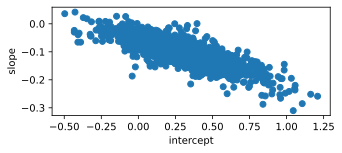

In [ ]:
# 1.1

# defining x and y
drug = np.array([0.,3,3.1,3.2,4.1,5,11])
growth_rate = np.array([0.01,0.005,0.01,0.0,-0.001,-0.0013,-1.])

lin_regression = Model()

# run bayesian inference
with lin_regression:  
  lnsigma = Normal("lnsigma", -1,3)
  intercept = Normal("intercept", 0, 5)
  slope = Normal("slope", 0 , 10)
  likelihood = Normal("y", intercept + slope * drug, np.exp(lnsigma), observed=growth_rate)

  trace = sample(3000, cores=3)

# plotting intercept vs slope from our samples
fig,ax = plt.subplots(figsize=(5,2))
ax.set_xlabel("intercept")
ax.set_ylabel("slope")
ax.plot(trace["intercept"],trace["slope"],"o")

Using this model, it seems that the intercept can will most likely fall somewhere between -0.3 and 1, noting more extreme values can still occur. Similarly, the slope will most likely be between 0 and -0.2, with other possible extreme values. And it seems that there is about a 50% chance that the slope will be less than -0.1.

In [ ]:
# finding proportion of slopes < -0.1
count = 0
for slope in trace["slope"]:
  if slope < -.1:
    count+=1

print(count/len(trace["slope"]))

0.5164444444444445


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [slope, intercept, lnsigma]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 17 seconds.


Text(0.5, 0, 'slope')

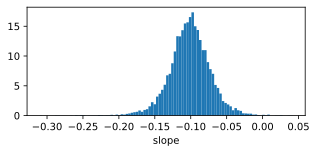

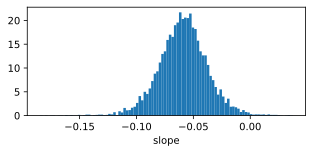

In [ ]:
# 1.2

# plotting prior slope
fig,ax = plt.subplots(figsize=(5,2))
ax.hist(trace["slope"],100, density = True)
ax.set_xlabel("slope")

lin_regression = Model()

# run bayesian inference
with lin_regression:  
  lnsigma = Normal("lnsigma", -1,3)
  intercept = Normal("intercept", 0.01, 0.001)
  slope = Normal("slope", 0 , 10)
  likelihood = Normal("y", intercept + slope * drug, np.exp(lnsigma), observed=growth_rate)

  trace = sample(3000, cores=3)

# plotting slope with new priors
fig,bx = plt.subplots(figsize=(5,2))
bx.hist(trace["slope"],100, density = True)
bx.set_xlabel("slope")


In [ ]:
# finding proportion of slopes < -0.1
count = 0
for slope in trace["slope"]:
  if slope < -.1:
    count+=1

print(count/len(trace["slope"]))

0.028888888888888888


The odds of the slope being less than -0.1 is significantly less. This makes sense, as we are way more confident that the intercept will be around 0.001. Since x and y didn't change, the slope must adjust to the intercept's adjustment in order to maintain the same x and y. The slope will be thus a little greater and more narrow.

In [ ]:
# 1.3

# getting attractiveness/sex ratio info
url = "/content/sexratio.rda"
!pip install pyreadr
import pyreadr
data_raw = pyreadr.read_r(url)
x,y = data_raw["sexratio"].x.values,data_raw["sexratio"].y.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [slope, intercept, lnsigma]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 11 seconds.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.190
Date:                Fri, 15 Oct 2021   Prob (F-statistic):              0.355
Time:                        21:51:51   Log-Likelihood:                -13.166
No. Observations:                   5   AIC:                             30.33
Df Residuals:                       3   BIC:                             29.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4000      1.944     25.409      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Text(0, 0.5, 'attractiveness')

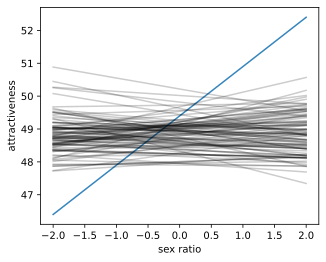

In [ ]:
lin_regression = Model()

# run bayesian inference
with lin_regression:  
  lnsigma = Normal("lnsigma", 0,4)
  intercept = Normal("intercept", 48.8, 0.5)
  slope = Normal("slope", 0 , .2)
  likelihood = Normal("y", intercept + slope * x, np.exp(lnsigma), observed=y)

  trace = sample(3000, cores=3)

fig,ax = plt.subplots(figsize=(5,4))

# uses statsmodels and plots regression line from statsmodels
sm_model = sm.OLS(y,sm.add_constant(x))
results = sm_model.fit()
print(results.summary())
b_fit,a_fit = results.params
sigma_fit = np.sqrt(results.mse_resid)
ax.plot(x,a_fit*x+b_fit,"-",alpha=0.9,label="statsmodels")

# plots 100 regression lines from pymc model
for q in trace[0:100]:
  ax.plot(x,x*q["slope"] + q["intercept"],"-",alpha=0.2,color="k")


ax.set_xlabel("sex ratio")
ax.set_ylabel("attractiveness")

# Predictive uncertainty 

Once we have computed the posterior distribution, we usually want to use it to make predictions. Posterior predictions, like prior predictions, are made by simulating are model with samples from the posterior. It's useful to develop an intuition about how uncertainty about parameters propagates to predictive uncertainty. 

**Exercises**

3.1 Using the data on kids scores, perform a bayesian regression using only IQ as a predictor with the following priors
\begin{align}
a \sim {\rm Normal}(0,0.1)\\
b \sim {\rm Normal}(0,100)\\
\ln \sigma \sim {\rm Normal}(1,1)\\
\end{align}
If you select these priors, what does it say about your stance on mother IQ as a determinant of student outcomes? Plot a histogram of the posterior distribution of the slope along with a histogram of the prior on the slope. Pretending you had selected these priors yourself, are you suprised by the result?  

3.2 What is the chance that a student whose mother has an IQ of $130$ does better than a student whose mother's IQ is 80? Use statsmodels to compute the $R^2$ value. Together, what do these calculations tell you about our ability to predict **individual** student scores from mother IQ? 

3.4 (NOT GRADED) Let's consider the data on economic growth and election vote shares yet agian.  Using weakly informative priors, use pymc to sample the posterior, compuite the posterior distribution. Then predict the chance that the incumbent wins for each $x$ in `x_range = [-4,-2,-3,...,3,4]`. Plot the predictions as a function of $x$. Make the same plot but instead make predictions using the fitted model from statsmodels. How do they compare? can you give an inuition for why they differ? Play around with the priors and see how this figure changes. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [slope, intercept, lnsigma]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 48 seconds.


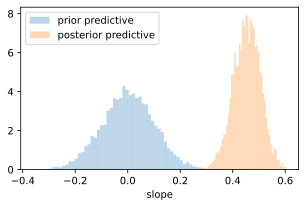

In [ ]:
# 3.1

data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")
x = np.array(data["mom_iq"])
y = np.array(data["kid_score"])

# define my priors
lnsigma_mu_prior = 1
lnsigma_std_prior = 1
intercept_mu_prior = 0
intercept_std_prior = 100
slope_mu_prior = 0
slope_std_prior = .1

# make prior predictions of test score
y_prior_samples = []
n_samps = 10000
for k in range(n_samps ):
  # take samples from prior
  a = np.random.normal(slope_mu_prior,slope_std_prior)
  y_prior_samples.append(a)

# run bayesian inference
lin_regression = Model()
with lin_regression:  
    lnsigma = Normal("lnsigma", lnsigma_mu_prior,lnsigma_std_prior)
    intercept = Normal("intercept", intercept_mu_prior, intercept_std_prior)
    slope = Normal("slope", slope_mu_prior , slope_std_prior)
    likelihood = Normal("y", mu=intercept + slope * x, sigma=np.exp(lnsigma), observed=y)
    
    trace = sample(5000,cores=3)


# make posterior predictions
y_posterior_samples = []
for samp in trace:
  # take samples from posterior
  a = samp["slope"]
  y_posterior_samples.append(a)

# turn the list into an array
y_posterior_samples= np.array(y_posterior_samples)

# plot prior vs posterior samples of slopes
fig,ax = plt.subplots(figsize=(5,3))
ax.hist(y_prior_samples,60,alpha=0.3,density=True,label="prior predictive");
ax.hist(y_posterior_samples,60,alpha=0.3,density=True,label="posterior predictive");
ax.set_xlabel("slope")
ax.legend()

Using these priors, we assumed that there was not much of a correlation between mother's iq and kid's test score as seen with our priors on a. As seen in the graph, we are surprised that the slope is centered between 0.4 and 0.5, thus denoting somewhat of a correlation between iq and test score.

In [ ]:
# 3.2

# make posterior predictions
highiq = []
for samp in trace:
  # take samples from posterior
  a = samp["slope"]
  b = samp["intercept"]
  lnsigma =  samp["lnsigma"]
  sigma = np.exp(lnsigma)
  # simulate the model
  y_samp = np.random.normal(a*130 + b,sigma)
  highiq.append(y_samp)

lowiq = []
for samp in trace:
  # take samples from posterior
  a = samp["slope"]
  b = samp["intercept"]
  lnsigma =  samp["lnsigma"]
  sigma = np.exp(lnsigma)
  # simulate the model
  y_samp = np.random.normal(a*80 + b,sigma)
  lowiq.append(y_samp)

# proportion of kid with mom high iq doing better than kid with mom low iq
count = 0
for samp in range(len(highiq)):
  if highiq[samp] > lowiq[samp]:
    count+=1

print(count/len(highiq))

# defines X in terms of the previously defined x
X = sm.add_constant(x)

# creates the "model" object
model= sm.OLS(y,X) 

# this command actually does the computations which give the results
results = model.fit()

print("rsquared = " + str(results.rsquared))


0.8136
rsquared = 0.20095123075855126


Our model predicts about a 80% chance for a student with mother iq=130 to do better than a student with mother iq=80. However, with our relatively small r-squared value, our predictions are fairly inaccurate so we suspect the true chance to be less than 80%. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [slope, intercept, lnsigma]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 15 seconds.


x= -4: p = 0.004666666666666667
x= -3: p = 0.011666666666666667
x= -2: p = 0.035
x= -1: p = 0.06933333333333333
x= 0: p = 0.205
x= 1: p = 0.44433333333333336
x= 2: p = 0.726
x= 3: p = 0.8973333333333333
x= 4: p = 0.9693333333333334


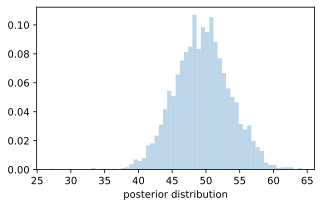

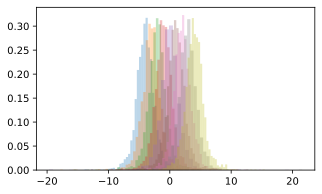

In [ ]:
# 3.3 

url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
data = pd.read_csv(url,sep="\s+");
x = data.growth
y = data.vote

# define priors
lnsigma_mu_prior = 1
lnsigma_std_prior = 1
intercept_mu_prior = 50
intercept_std_prior = 10
slope_mu_prior = 0
slope_std_prior = 5

# run bayesian inference
lin_regression = Model()
with lin_regression:  
    lnsigma = Normal("lnsigma", lnsigma_mu_prior,lnsigma_std_prior)
    intercept = Normal("intercept", intercept_mu_prior, intercept_std_prior)
    slope = Normal("slope", slope_mu_prior , slope_std_prior)
    likelihood = Normal("y", mu=intercept + slope * x, sigma=np.exp(lnsigma), observed=y)
    
    trace = sample(3000,cores=3)

x = 1
post = []
for samp in trace:
  # take samples from posterior
  a = samp["slope"]
  b = samp["intercept"]
  lnsigma =  samp["lnsigma"]
  sigma = np.exp(lnsigma)
  # simulate the model
  y_samp = np.random.normal(a*x + b,sigma)
  post.append(y_samp)

fig,ax = plt.subplots(figsize=(5,3))
ax.hist(post,60,alpha=0.3,density=True,label="post predictive");
ax.set_xlabel("posterior distribution")

x = [-4, -3, -2, -1, 0, 1, 2, 3, 4]

# plot posterior distribution as x increases in range
fig,bx = plt.subplots(figsize=(5,3))
for econ in x:
  count = 0
  funcx = []
  for samp in trace:
    # take samples from posterior
    a = samp["slope"]
    b = samp["intercept"]
    lnsigma =  samp["lnsigma"]
    sigma = np.exp(lnsigma)
    # simulate the model
    samp1 = np.random.normal(a*econ + b,sigma)
    # turn 
    xpost = (samp1 - b)/a
    funcx.append(xpost)
    if samp1 > 50:
      count+=1
  print("x= " + str(econ) + ": p = " + str(count/len(trace)))
  bx.hist(funcx,60,alpha=0.3,density=True,label="post predictive");


